In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1qqAH_Bh2lT1RXP_neIcjvIeBvm0Ij31C')

In [ ]:
df.head()

,Unnamed: 0,namsinh,gioitinh,noisinh,lopsh,khoa,hedt,khoahoc,chuyennganh2,dien_tt,diem_tt,lop12_matinh,lop12_matruong,dtbhk1,dtbhk2,dtbhk3,dtbhk4,dtbhk5,dtbhk6,dtbhk7,dtbhkh1,dtbhkh2,dtbhkh3,stchk1,stchk2,stchk3,stchk4,stchk5,stchk6,stchk7,stchkh1,stchkh2,stchkh3,sotc_tichluy,hoclaihk1,hoclaihk2,hoclaihk3,hoclaihk4,hoclaihk5,hoclaihk6,hoclaihk7,hoclaihkh1,hoclaihkh2,hoclaihkh3,AVHK1,AVHK2,AVHKH1,AVHK3,AVHK4,AVHKH2,AVHK5,AVHK6,AVHKH3,AVHK7,drlhk1,drlhk2,drlhk3,drlhk4,drlhk5,drlhk6,drlhk7,xeploai
0,0,1995.0,1.0,Hồ Chí Minh,KTPM0001,CNPM,0,8.0,D480103,0.0,31.0,2.0,102.0,6.02,7.03,6.40,7.01,6.35,6.77,6.24,0.00,0.00,0.00,0,0,0,22,18,26,19,20,19,16,155.0,5.0,0.0,5.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,2,3,3,4,4,4,4,4,4,4,95,77,74,82,92,78,64,0
1,1,1995.0,0.0,Hà Tĩnh,KTPM0001,CNPM,0,8.0,D480103,0.0,27.0,30.0,45.0,7.36,7.41,7.95,8.48,7.69,7.96,8.01,0.00,0.00,0.00,0,0,0,22,22,19,21,16,15,16,155.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3,3,3,3,3,4,4,4,4,96,97,97,92,94,79,75,1
2,2,1995.0,1.0,Quảng Ngãi,HTTT0001,HTTT,0,8.0,D52480104,0.0,26.0,35.0,15.0,4.18,5.70,5.30,4.38,5.66,5.06,6.31,2.45,5.81,7.59,10,7,7,22,20,25,17,28,26,20,154.0,10.0,7.0,8.0,11.0,4.0,7.0,0.0,10.0,0.0,0.0,2,3,3,4,4,4,4,4,4,4,97,72,81,61,90,58,56,0
3,3,1994.0,1.0,Hồ Chí Minh,KHMT0001,KHMT,0,8.0,D480101,0.0,24.5,2.0,40.0,5.52,4.13,5.79,6.74,7.31,5.64,6.32,5.50,6.98,0.00,6,11,0,22,15,28,19,27,20,22,142.0,9.0,7.0,8.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,2,3,3,4,4,4,4,4,4,4,62,88,92,86,50,39,56,0
4,4,1995.0,1.0,Khánh Hoà,MMTT0001,MMT&TT,0,8.0,D480102,0.0,28.0,41.0,15.0,7.41,5.87,6.26,7.47,7.29,6.43,6.58,0.00,0.00,7.36,0,0,7,22,19,23,19,21,18,15,149.0,3.0,7.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2,3,3,4,4,4,4,4,4,4,70,73,68,72,55,77,62,0


In [ ]:
# Loại bỏ các cột không cần thiết
columns_to_drop = [
    'namsinh', 'gioitinh', 'noisinh', 'lopsh', 'khoa', 'hedt', 'khoahoc',
    'chuyennganh2', 'lop12_matinh', 'lop12_matruong', 'xeploai'
]
existing_columns = df.columns
valid_columns_to_drop = [col for col in columns_to_drop if col in existing_columns]
df.drop(columns=valid_columns_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3256 entries, 0 to 3255
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3256 non-null   int64  
 1    namsinh       3256 non-null   float64
 2    gioitinh      3256 non-null   float64
 3    noisinh       3254 non-null   object 
 4    lopsh         3256 non-null   object 
 5    khoa          3256 non-null   object 
 6    hedt          3256 non-null   int64  
 7    khoahoc       3256 non-null   float64
 8    chuyennganh2  3256 non-null   object 
 9   dien_tt        3256 non-null   float64
 10  diem_tt        3256 non-null   float64
 11  dtbhk1         3256 non-null   float64
 12  dtbhk2         3256 non-null   float64
 13  dtbhk3         3256 non-null   float64
 14  dtbhk4         3256 non-null   float64
 15  dtbhk5         3256 non-null   float64
 16  dtbhk6         3256 non-null   float64
 17  dtbhk7         3256 non-null   float64
 18  dtbhkh1 

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Thay thế giá trị thiếu bằng giá trị trung bình cho các cột số
numeric_df.fillna(numeric_df.mean(), inplace=True)

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df[['dtbhk1', 'dtbhk2', 'dtbhk3', 'stchk1', 'stchk2', 'stchk3']] = scaler.fit_transform(
    df[['dtbhk1', 'dtbhk2', 'dtbhk3', 'stchk1', 'stchk2', 'stchk3']]
)

# Phân cụm dữ liệu với KMeans
kmeans = KMeans(n_clusters=50, random_state=42)  # Chia thành 50 cụm
df['cluster'] = kmeans.fit_predict(df[['dtbhk1', 'dtbhk2', 'dtbhk3', 'stchk1', 'stchk2', 'stchk3']])

# Lấy mẫu ngẫu nhiên 5 sinh viên từ mỗi cụm
sampled_df = df.groupby('cluster').apply(lambda x: x.sample(n=5, random_state=42)).reset_index(drop=True)

# Lưu dữ liệu đã được rút gọn
sampled_df.to_csv('data_sampled.csv', index=False)

print("Dữ liệu đã được rút gọn và lưu vào file data_sampled.csv")

Dữ liệu đã được rút gọn và lưu vào file data_sampled.csv


<ipython-input-10-a16eddf79b9a>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('cluster').apply(lambda x: x.sample(n=5, random_state=42)).reset_index(drop=True)


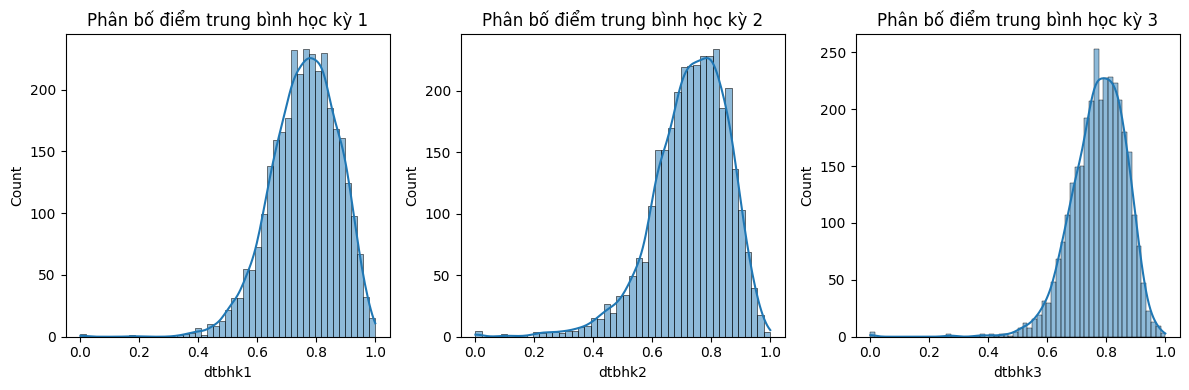

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Hiển thị histogram của điểm trung bình các học kỳ
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['dtbhk1'], kde=True)
plt.title('Phân bố điểm trung bình học kỳ 1')
plt.subplot(1, 3, 2)
sns.histplot(df['dtbhk2'], kde=True)
plt.title('Phân bố điểm trung bình học kỳ 2')
plt.subplot(1, 3, 3)
sns.histplot(df['dtbhk3'], kde=True)
plt.title('Phân bố điểm trung bình học kỳ 3')
plt.tight_layout()
plt.show()

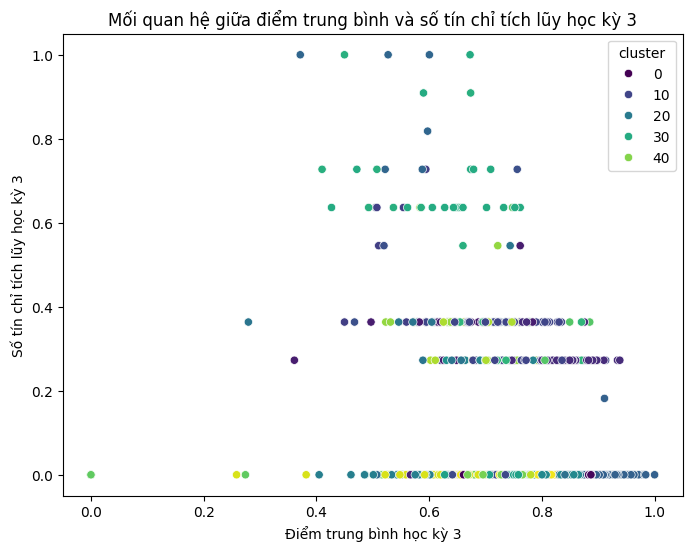

In [ ]:
# Hiển thị scatter plot giữa điểm trung bình và số tín chỉ tích lũy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dtbhk3', y='stchk3', hue='cluster', data=df, palette='viridis')
plt.title('Mối quan hệ giữa điểm trung bình và số tín chỉ tích lũy học kỳ 3')
plt.xlabel('Điểm trung bình học kỳ 3')
plt.ylabel('Số tín chỉ tích lũy học kỳ 3')
plt.show()


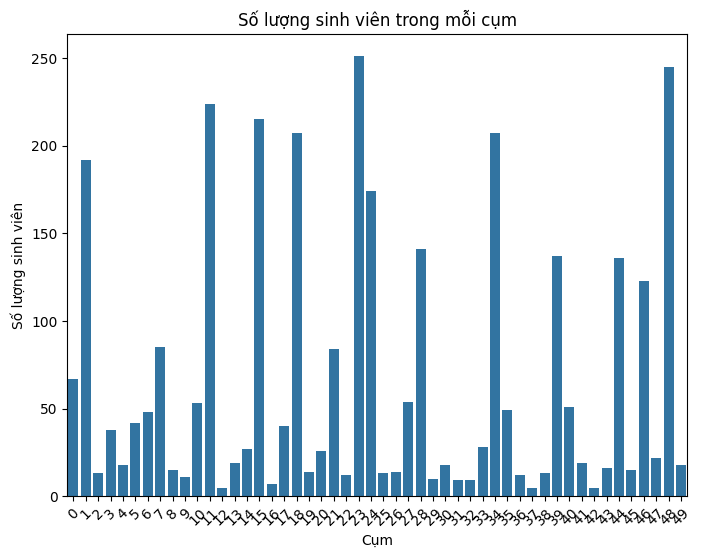

In [ ]:

# Hiển thị số lượng sinh viên trong mỗi cụm
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df)
plt.title('Số lượng sinh viên trong mỗi cụm')
plt.xlabel('Cụm')
plt.ylabel('Số lượng sinh viên')
plt.xticks(rotation=45)
plt.show()

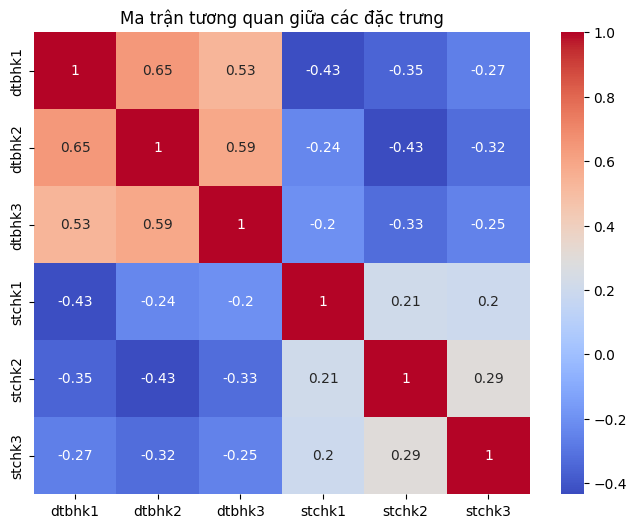

In [ ]:
plt.figure(figsize=(8, 6))
corr_matrix = df[['dtbhk1', 'dtbhk2', 'dtbhk3', 'stchk1', 'stchk2', 'stchk3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các đặc trưng')
plt.show()

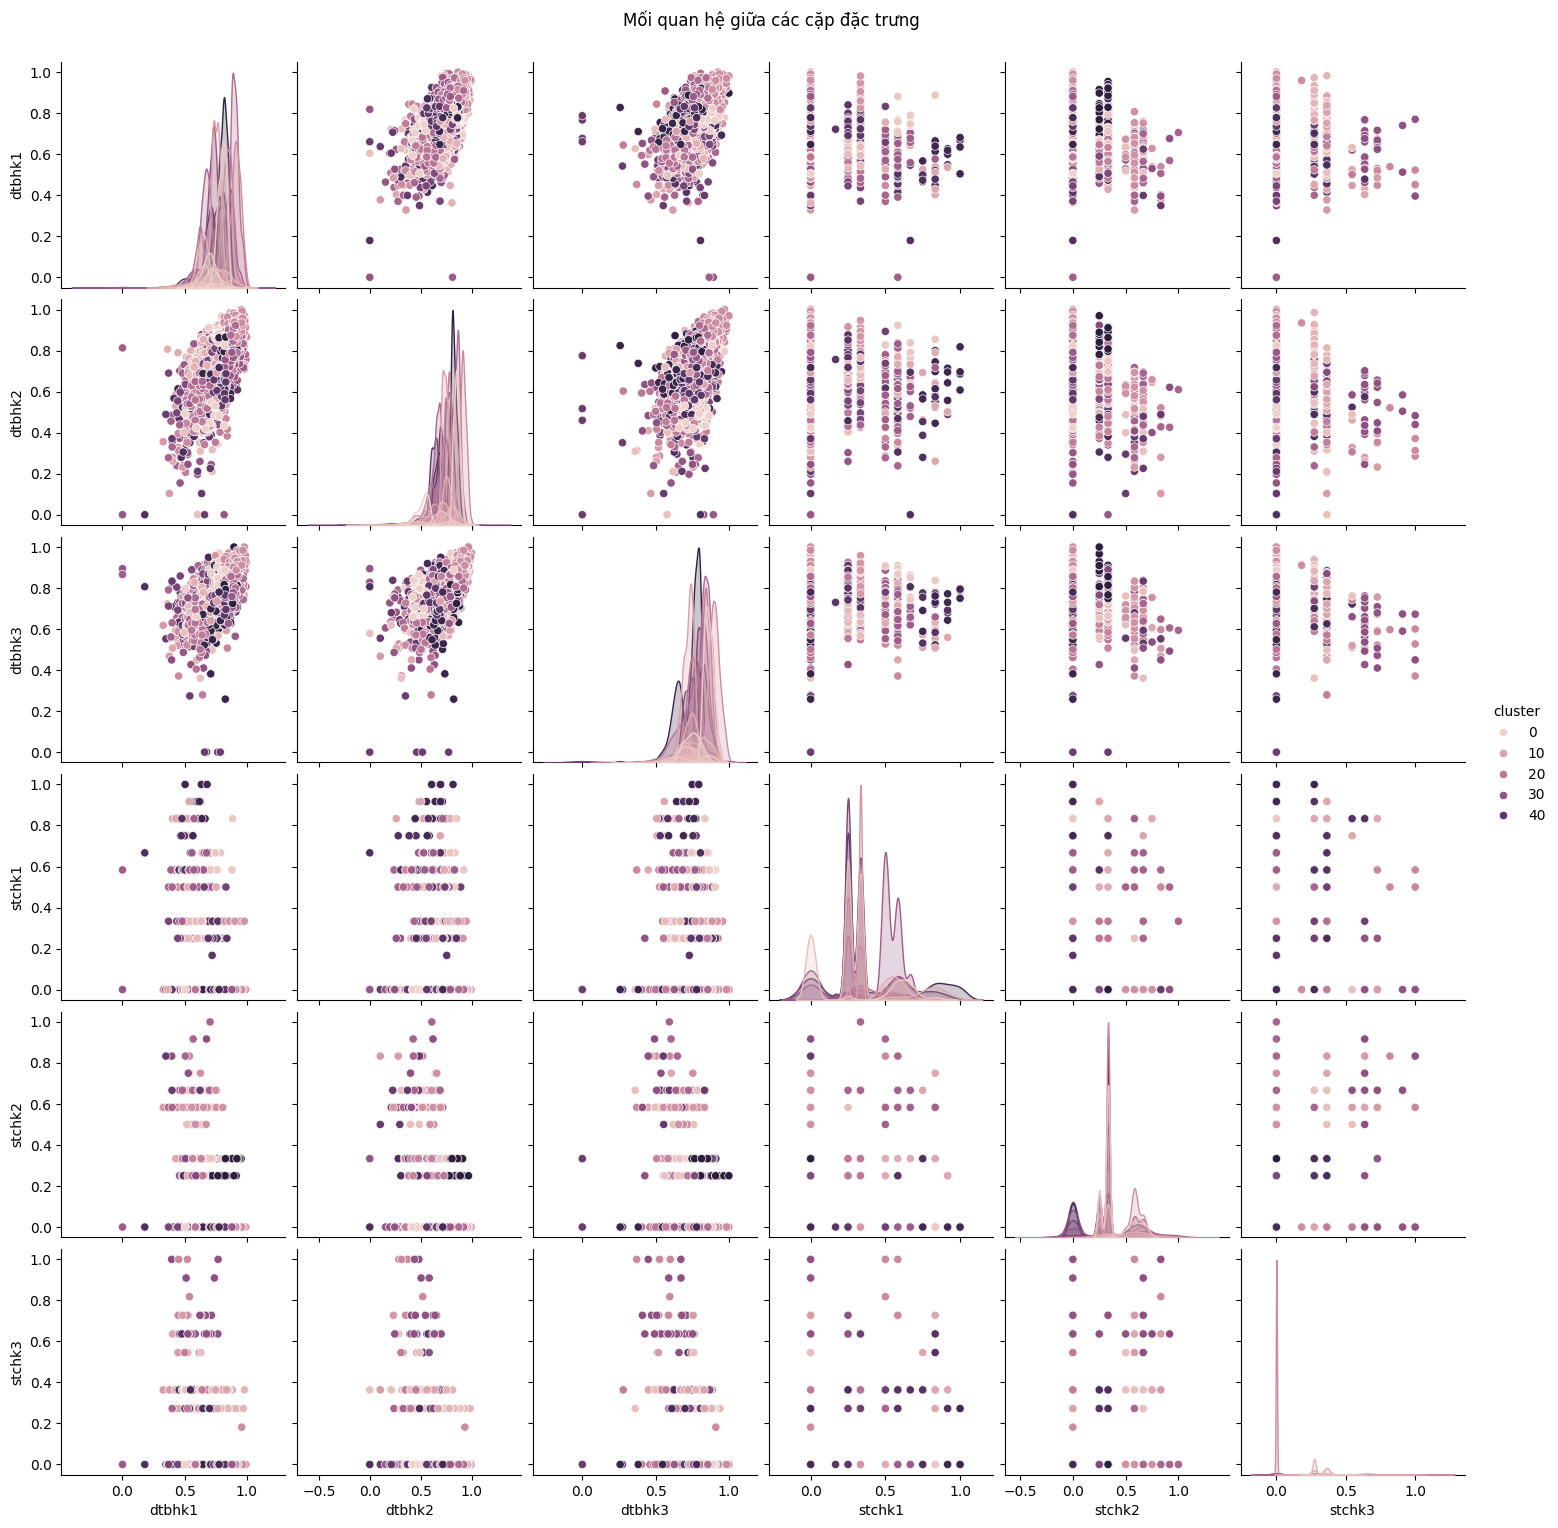

In [ ]:
sns.pairplot(df[['dtbhk1', 'dtbhk2', 'dtbhk3', 'stchk1', 'stchk2', 'stchk3', 'cluster']], hue='cluster')
plt.suptitle('Mối quan hệ giữa các cặp đặc trưng', y=1.02)
plt.show()

Số lượng nút: 3398
Số lượng cạnh: 135065


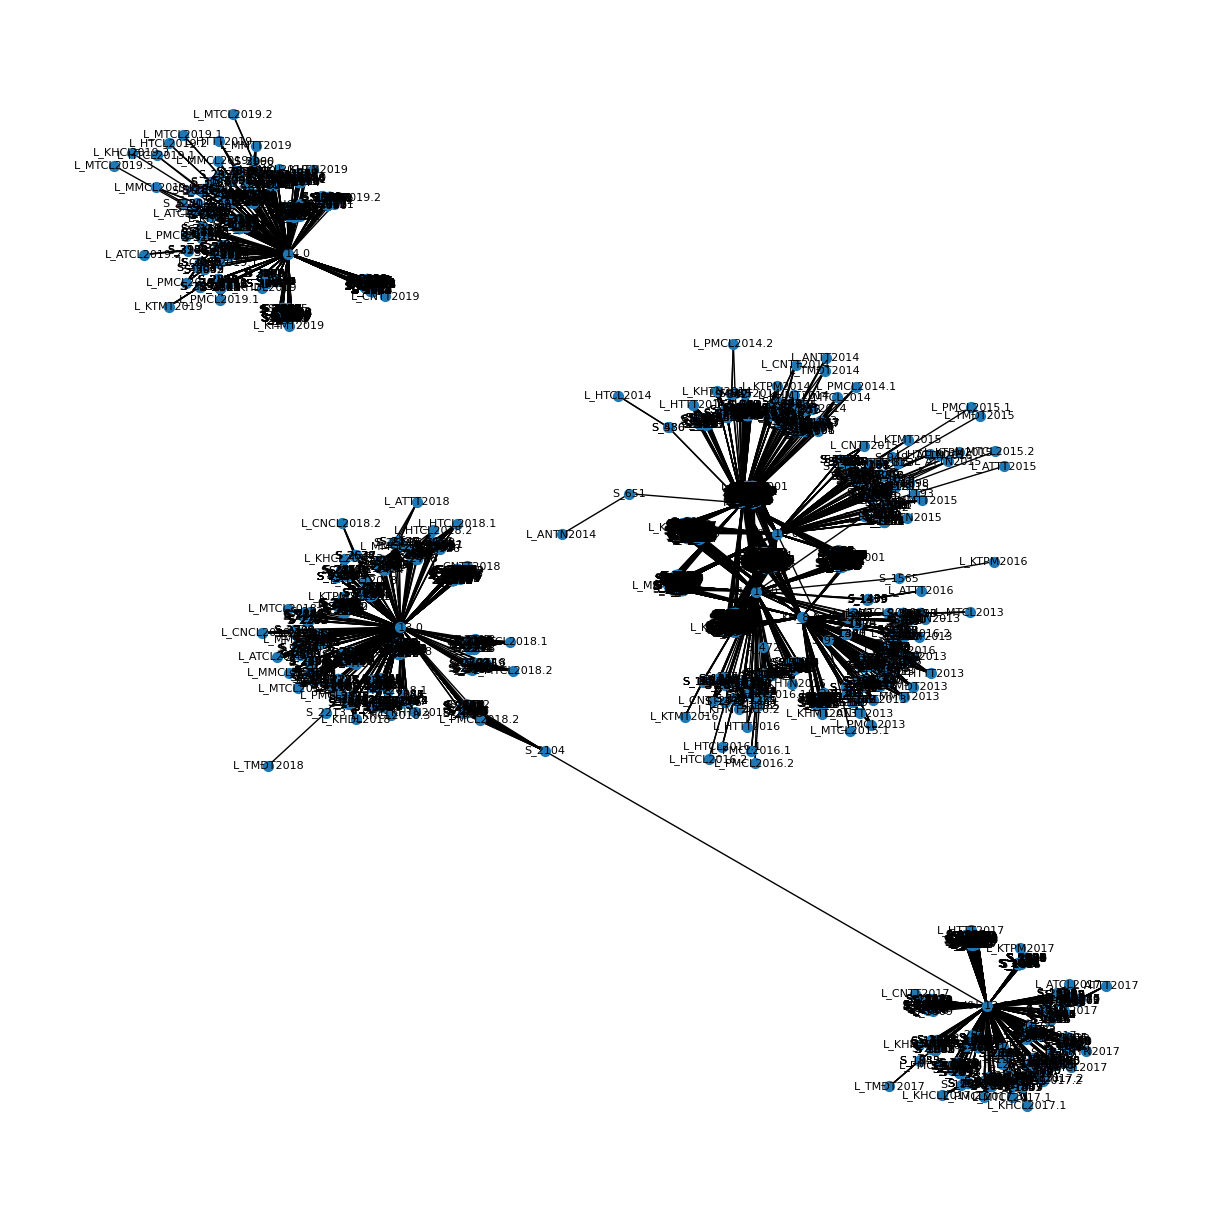

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Khởi tạo đồ thị rỗng
graph = nx.Graph()

# Thêm nút sinh viên
for _, row in df.iterrows():
    student_id = row['Unnamed: 0']
    classification = row[' xeploai']
    graph.add_node(f"S_{student_id}", label=f"S_{student_id}", classification=classification, node_type='student')

# Thêm nút lớp sinh hoạt
lopsh_values = df[' lopsh'].unique()
for lopsh in lopsh_values:
    graph.add_node(f"L_{lopsh}", label=f"L_{lopsh}", node_type='lopsh')

# Thêm nút khóa học
khoahoc_values = df[' khoahoc'].unique()
for khoahoc in khoahoc_values:
    graph.add_node(f"KH_{khoahoc}", label=f"KH_{khoahoc}", node_type='khoahoc')

# Thêm nút môn học (chưa có dữ liệu môn học trong tập dữ liệu)
# ...

# Thêm cạnh Sinh viên - Sinh viên (cùng lớp)
for lopsh in lopsh_values:
    students_in_lopsh = df[df[' lopsh'] == lopsh]['Unnamed: 0'].tolist()
    for i in range(len(students_in_lopsh)):
        for j in range(i + 1, len(students_in_lopsh)):
            graph.add_edge(f"S_{students_in_lopsh[i]}", f"S_{students_in_lopsh[j]}", weight=1, edge_type='cung_lop')

# Thêm cạnh Sinh viên - Lớp sinh hoạt
for _, row in df.iterrows():
    student_id = row['Unnamed: 0']
    lopsh = row[' lopsh']
    graph.add_edge(f"S_{student_id}", f"L_{lopsh}", weight=1, edge_type='sinh_vien_lop')

# Thêm cạnh Sinh viên - Khóa học
for _, row in df.iterrows():
    student_id = row['Unnamed: 0']
    khoahoc = row[' khoahoc']
    graph.add_edge(f"S_{student_id}", f"KH_{khoahoc}", weight=1, edge_type='sinh_vien_khoa_hoc')

# Thêm cạnh Sinh viên - Môn học (chưa có dữ liệu môn học)
# ...

# Trực quan hóa
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=50, font_size=8)
plt.savefig('student_network.pdf')

# In kết quả
print("Số lượng nút:", graph.number_of_nodes())
print("Số lượng cạnh:", graph.number_of_edges())

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Đọc dữ liệu
df = pd.read_csv('/content/drive/MyDrive/MXH/IS353.P11_Nhóm_4/Đồ án môn học/Project/data_sampled.csv')

# Check if the column name is ' xeploai' instead of 'xeploai'
# and rename it if necessary
if ' xeploai' in df.columns and 'xeploai' not in df.columns:
    df.rename(columns={' xeploai': 'xeploai'}, inplace=True)

# Chuyển đổi xếp loại tốt nghiệp sang dạng số
xeploai_mapping = {'TB Khá': 0, 'Khá': 1, 'Giỏi': 2, 'Xuất sắc': 3}
df['xeploai'] = df['xeploai'].map(xeploai_mapping)

# Lựa chọn đặc trưng
features = ['dtbhk1', 'dtbhk2', 'dtbhk3', 'stchk1', 'stchk2', 'stchk3', 'cluster']
X = df[features]
y = df['xeploai']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo các mô hình học máy
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Tìm kiếm siêu tham số tối ưu cho từng mô hình bằng GridSearchCV
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'Decision Tree': {'max_depth': [3, 5, 7]},
    'KNN': {'n_neighbors': [3, 5, 7]}
}

for name, model in models.items():
    print(f'Huấn luyện mô hình {name}...')
    grid_search = GridSearchCV(model, param_grids[name], cv=5)
    grid_search.fit(X_train, y_train)
    models[name] = grid_search.best_estimator_

# Đánh giá mô hình
results = {}
for name, model in models.items():
    print(f'Đánh giá mô hình {name}...')
    y_pred = model.predict(X_test)
    results[name] = {
        'f1_macro': f1_score(y_test, y_pred, average='macro'),
        'f1_weighted': f1_score(y_test, y_pred, average='weighted'),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Hiển thị kết quả
for name, result in results.items():
    print(f'Kết quả của mô hình {name}')

Huấn luyện mô hình Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.